In [ ]:
!pip install gdown
!gdown --id 1AtPRPWhXmgyMVBs7PHYG3J3Sqk3iCVRC
!unzip /content/archive.zip
!rm /content/archive.zip

Downloading...
From: https://drive.google.com/uc?id=1AtPRPWhXmgyMVBs7PHYG3J3Sqk3iCVRC
To: /content/archive.zip
100% 42.9k/42.9k [00:00<00:00, 1.35MB/s]
Archive:  /content/archive.zip
  inflating: Video_games_esrb_rating.csv  
  inflating: test_esrb.csv           


# 1.Collect Data and Import Data

In [ ]:
import pandas as pd

In [ ]:
def load_data():
    train_set = pd.read_csv('Video_games_esrb_rating.csv')
    test_set = pd.read_csv('test_esrb.csv')
    return train_set,test_set

In [ ]:
train_set,test_set = load_data()

In [ ]:
train_set.sample(5)

,title,console,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence,esrb_rating
1,Subnautica: Below Zero,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,ET
213,My Baby,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,E
1320,Lunch Truck Tycoon 2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,ET
78,Mighty Gunvolt Burst,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,E
542,The Sims™ 4 Moschino Stuff Pack,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,T


# 2.Data Clensing and Exploration

## Unique Feature Checking

In [ ]:
for col in train_set:
    print(col,' : ',train_set[col].unique())
    print('-------------------------------------------------------------')

title  :  ['Monster Jam Steel Titans 2' 'Subnautica: Below Zero'
 'NIER REPLICANT VER.1.22474487139…' ... 'SPARC' 'Still Time'
 'Surf World Series']
-------------------------------------------------------------
console  :  [1 0]
-------------------------------------------------------------
alcohol_reference  :  [0 1]
-------------------------------------------------------------
animated_blood  :  [0 1]
-------------------------------------------------------------
blood  :  [0 1]
-------------------------------------------------------------
blood_and_gore  :  [0 1]
-------------------------------------------------------------
cartoon_violence  :  [0 1]
-------------------------------------------------------------
crude_humor  :  [0 1]
-------------------------------------------------------------
drug_reference  :  [0 1]
-------------------------------------------------------------
fantasy_violence  :  [0 1]
-------------------------------------------------------------
intense_violence  

## Dimension Checking

In [ ]:
train_set.shape # 1895 Games and 33 Features 1 Label

(1895, 34)

In [ ]:
test_set.shape # 500 Games and 33 Features 1 Label

(500, 34)

## Data Type Checking

In [ ]:
train_set.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_janguage              int64
strong_sexual_conten

In [ ]:
test_set.dtypes

title                       object
console                      int64
alcohol_reference            int64
animated_blood               int64
blood                        int64
blood_and_gore               int64
cartoon_violence             int64
crude_humor                  int64
drug_reference               int64
fantasy_violence             int64
intense_violence             int64
language                     int64
lyrics                       int64
mature_humor                 int64
mild_blood                   int64
mild_cartoon_violence        int64
mild_fantasy_violence        int64
mild_language                int64
mild_lyrics                  int64
mild_suggestive_themes       int64
mild_violence                int64
no_descriptors               int64
nudity                       int64
partial_nudity               int64
sexual_content               int64
sexual_themes                int64
simulated_gambling           int64
strong_janguage              int64
strong_sexual_conten

## Class Checking 

Class Remark
- T = Teen
- E = Everyone
- ET = Everyone 10+
- M = Mature 17+

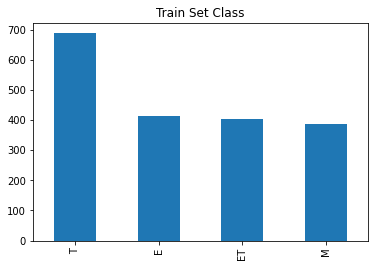

In [ ]:
train_set['esrb_rating'].value_counts().plot(kind='bar',title='Train Set Class')

In [ ]:
train_set['esrb_rating'].value_counts()

T     689
E     416
ET    403
M     387
Name: esrb_rating, dtype: int64

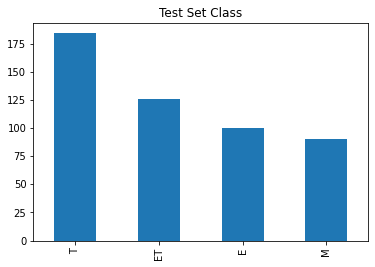

In [ ]:
test_set['esrb_rating'].value_counts().plot(kind='bar',title='Test Set Class')

In [ ]:
test_set['esrb_rating'].value_counts()

T     184
ET    126
E     100
M      90
Name: esrb_rating, dtype: int64

## Null Value Checking

In [ ]:
train_set.isnull().sum() # No Null Value Problem

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

In [ ]:
test_set.isna().sum() # No Null Value Problem

title                       0
console                     0
alcohol_reference           0
animated_blood              0
blood                       0
blood_and_gore              0
cartoon_violence            0
crude_humor                 0
drug_reference              0
fantasy_violence            0
intense_violence            0
language                    0
lyrics                      0
mature_humor                0
mild_blood                  0
mild_cartoon_violence       0
mild_fantasy_violence       0
mild_language               0
mild_lyrics                 0
mild_suggestive_themes      0
mild_violence               0
no_descriptors              0
nudity                      0
partial_nudity              0
sexual_content              0
sexual_themes               0
simulated_gambling          0
strong_janguage             0
strong_sexual_content       0
suggestive_themes           0
use_of_alcohol              0
use_of_drugs_and_alcohol    0
violence                    0
esrb_ratin

## Shuffle Data

In [ ]:
def data_preprocessing(df) :   
  # Shuffle the data
  df = df.sample(frac=1.0, random_state=41).reset_index(drop=True)

In [ ]:
data_preprocessing(train_set)
data_preprocessing(test_set)

# 3. Feature Extraction

In [ ]:
def Feature_Extraction(df):
    label = df['esrb_rating']
    label = df['esrb_rating'].map({ "E" :0, "ET" : 1 , "T" : 2 , "M" : 3}) # แปลง Class ให้เป็นตัวเลข
    feature = df.drop(['title','esrb_rating','console'], axis=1)
    feature = feature._get_numeric_data()
    return feature,label

In [ ]:
train_feature,train_label = Feature_Extraction(train_set)

In [ ]:
test_feature,test_label = Feature_Extraction(test_set)

In [ ]:
train_feature.dtypes

alcohol_reference           int64
animated_blood              int64
blood                       int64
blood_and_gore              int64
cartoon_violence            int64
crude_humor                 int64
drug_reference              int64
fantasy_violence            int64
intense_violence            int64
language                    int64
lyrics                      int64
mature_humor                int64
mild_blood                  int64
mild_cartoon_violence       int64
mild_fantasy_violence       int64
mild_language               int64
mild_lyrics                 int64
mild_suggestive_themes      int64
mild_violence               int64
no_descriptors              int64
nudity                      int64
partial_nudity              int64
sexual_content              int64
sexual_themes               int64
simulated_gambling          int64
strong_janguage             int64
strong_sexual_content       int64
suggestive_themes           int64
use_of_alcohol              int64
use_of_drugs_a

In [ ]:
train_label.dtypes

dtype('int64')

# 4.Training Model

## Random Forest

In [ ]:
def RandomForest_Training_Model(feature,label):
    from sklearn.ensemble import RandomForestClassifier

    RF_Model = RandomForestClassifier(  max_depth=10,random_state=41,criterion='entropy',n_estimators=40,oob_score=True, n_jobs=-1,min_samples_leaf=10)

    clf_RF_model = RF_Model.fit(feature,label)

    return clf_RF_model

In [ ]:
ESRB_RF_Model = RandomForest_Training_Model(train_feature,train_label)

In [ ]:
# RF Feature Improtance
feat_imp = pd.DataFrame()
feat_imp['feat_name'] = train_feature.columns
feat_imp['score'] = ESRB_RF_Model.feature_importances_
feat_imp.sort_values(by='score', ascending=False)

,feat_name,score
19,no_descriptors,0.172877
3,blood_and_gore,0.162438
25,strong_janguage,0.155777
7,fantasy_violence,0.133550
2,blood,0.130926
14,mild_fantasy_violence,0.050476
27,suggestive_themes,0.028131
23,sexual_themes,0.026715
30,violence,0.023213
8,intense_violence,0.018068


# 5.Evaluation

Train set

In [ ]:
ESRB_RF_Prediction = ESRB_RF_Model.predict(train_feature)

In [ ]:
def Model_Performace_Score(y_actual,y_predict):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    
    DT_Accuracy = format(accuracy_score(y_actual,y_predict))
    DT_Precision = format(precision_score(y_actual,y_predict,average='macro'))
    DT_Recall =format(recall_score(y_actual,y_predict,average='macro'))
    DT_F1=format(f1_score(y_actual,y_predict,average='macro'))
    Accuracy=print('Accuracy score: ', DT_Accuracy)
    Precision=print('Precision score: ',DT_Precision)
    Recall=print('Recall score:',DT_Recall)
    F1=print('F1 score: ',DT_F1)
    return  (Accuracy,Precision,Recall,F1)

In [ ]:
Model_Performace_Score(train_label,ESRB_RF_Prediction)

Accuracy score:  0.7931398416886544
Precision score:  0.8068679647185301
Recall score: 0.7970873162851065
F1 score:  0.801082493364769


(None, None, None, None)

In [ ]:
ESRB_RF_Prediction = ESRB_RF_Model.predict(test_feature)

In [ ]:
def Model_Performace_Score(y_actual,y_predict):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    
    DT_Accuracy = format(accuracy_score(y_actual,y_predict))
    DT_Precision = format(precision_score(y_actual,y_predict,average='macro'))
    DT_Recall =format(recall_score(y_actual,y_predict,average='macro'))
    DT_F1=format(f1_score(y_actual,y_predict,average='macro'))
    Accuracy=print('Accuracy score: ', DT_Accuracy)
    Precision=print('Precision score: ',DT_Precision)
    Recall=print('Recall score:',DT_Recall)
    F1=print('F1 score: ',DT_F1)
    return  (Accuracy,Precision,Recall,F1)

In [ ]:
Model_Performace_Score(test_label,ESRB_RF_Prediction)

Accuracy score:  0.766
Precision score:  0.8083207497105211
Recall score: 0.757802795031056
F1 score:  0.777652043434456


(None, None, None, None)

#การปรับปรุง Model ด้วย Hyperparameter Tuning the Random Forest

ความหมาย
set of hyperparameters:
- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)


การ Tuning ตัวแปรที่มีผลต่อความแม่นยำ

- n_estimators: จำนวน tree ใน Random Forest จำนวน tree ที่มากขึ้น จะทำให้ model performance ดีขึ้นจนถึงจุดนึงที่ performance เริ่มจะนิ่ง จนจำนวน tree ไม่มีผลต่อ model performance แล้ว… จำนวน tree ที่แนะนำ ตอนเทส model คร่าวๆ ก็ใช้ค่าน้อยๆ ก่อน (50–100 tree) ส่วนตอนที่จำ train จริงจังแล้วก็ใช้ค่า 1000 tree ขึ้นไป
- oob_score (True/False) : out of bag score (oob score) เป็นการระบุว่าจะใช้ data ในส่วนที่ไม่ถูก sample ไปทำ training โดยแต่ละ decision tree ใน Random Forest (step ทำ bootstrapping ในภาพ 1)สำหรับคำนวณ error ซึ่งเทียบเท่ากับการทำ validation จาก training set โดยที่ไม่ต้องทำแบ่งข้อมูลสำหรับทำ validation นั่นเอง! ซึ่งจะมีประโยชน์อย่างมากตอนที่เรามี data set ไม่ใหญ่มาก และไม่อยากหั่นข้อมูลสำหรับ validation set อีก
- min_samples_leaf : ระบุจำนวนข้อมูลขั้นต่ำใน leaf node ของแต่ละ decision tree หากมีจำนวนข้อมูลต่ำกว่า min_samples_leaf ให้หยุด split node นั้นๆ เป็นการลด overfitting… เราจะกำหนดค่า min_samples_leaf ให้สอดคล้องตามขนาดของ data set (เช่น ตั้งแต่ 2–100 ตามขนาดข้อมูล)
- max_features (0.0–1.0): ระบุว่าแต่ละ decision tree ใน Random Forest จะสามารถสุ่มหยิบ feature ไปได้มากที่สุดกี่ % (0.0–1.0 -> 0–100%) ซึ่งการไม่ set ค่าดังกล่าวสูงจนเกินไป จะเป็นการลดความสัมพันธ์กันเองของ tree (ลด correlation) และลดโอกาส overfit ของ model

In [ ]:
def RandomForest_Training_Model(feature,label):
    from sklearn.ensemble import RandomForestClassifier

    RF_Model = RandomForestClassifier(  max_depth=40,random_state=41,criterion='entropy',n_estimators=200,oob_score=True,max_features=0.5 ,n_jobs=-1,min_samples_leaf=3,bootstrap=True)

    clf_RF_model = RF_Model.fit(feature,label)

    return clf_RF_model

In [ ]:
ESRB_RF_Model = RandomForest_Training_Model(train_feature,train_label)

In [ ]:
feat_imp = pd.DataFrame()
feat_imp['feat_name'] = train_feature.columns
feat_imp['score'] = ESRB_RF_Model.feature_importances_
feat_imp.sort_values(by='score', ascending=False)

,feat_name,score
25,strong_janguage,0.169482
19,no_descriptors,0.152610
2,blood,0.123051
3,blood_and_gore,0.115669
7,fantasy_violence,0.097449
14,mild_fantasy_violence,0.054397
9,language,0.032244
27,suggestive_themes,0.027300
8,intense_violence,0.025110
30,violence,0.022450


In [ ]:
ESRB_RF_Prediction = ESRB_RF_Model.predict(test_feature)

In [ ]:
def Model_Performace_Score(y_actual,y_predict):
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import precision_score
    from sklearn.metrics import recall_score
    from sklearn.metrics import f1_score
    
    DT_Accuracy = format(accuracy_score(y_actual,y_predict))
    DT_Precision = format(precision_score(y_actual,y_predict,average='macro'))
    DT_Recall =format(recall_score(y_actual,y_predict,average='macro'))
    DT_F1=format(f1_score(y_actual,y_predict,average='macro'))
    Accuracy=print('Accuracy score: ', DT_Accuracy)
    Precision=print('Precision score: ',DT_Precision)
    Recall=print('Recall score:',DT_Recall)
    F1=print('F1 score: ',DT_F1)
    return  (Accuracy,Precision,Recall,F1)

In [ ]:
Model_Performace_Score(test_label,ESRB_RF_Prediction)

Accuracy score:  0.834
Precision score:  0.8570435636941344
Recall score: 0.8246851276742581
F1 score:  0.8342601874925696


(None, None, None, None)

#จะพบว่า Score เพิ่มขึ้นทั้ง Accuracy,Precision,Recall,F1

# Create ML Model Pipline

In [ ]:
def Create_model_pipline():
    #Get data
    train_set,test_set = load_data()

    # Data Cleansing
    data_preprocessing(train_set)
    data_preprocessing(test_set)
       
    #Feature Extraction
    train_feature,train_label = Feature_Extraction(train_set)
    test_feature,test_label = Feature_Extraction(test_set)
    
    #Train Model
    ESRB_RF_Model = RandomForest_Training_Model(train_feature,train_label) # Random Forest
    
    #Predection
    ESRB_RF_Prediction = ESRB_RF_Model.predict(test_feature)

    # Evaluation
    Perfomanance = Model_Performace_Score(test_label,ESRB_RF_Prediction)

    return Perfomanance

In [ ]:
Create_model_pipline()

Accuracy score:  0.834
Precision score:  0.8570435636941344
Recall score: 0.8246851276742581
F1 score:  0.8342601874925696


(None, None, None, None)

# Save Model as Joblib

In [ ]:
import joblib

In [ ]:
joblib.dump(ESRB_RF_Model,'ESRB_RF.model')

['ESRB_RF.model']

#การนำไปใช้ประโยชน์ 




การให้คะแนน ESRB ให้ข้อมูลเกี่ยวกับสิ่งที่อยู่ในเกมหรือแอปเพื่อให้ผู้ปกครองและผู้บริโภคตัดสินใจเลือกเกมที่เหมาะกับครอบครัวได้อย่างมีข้อมูล การให้คะแนนมี 3 ส่วน ได้แก่ หมวดหมู่การให้คะแนนตัวบอกเนื้อหาและองค์ประกอบเชิงโต้ตอบ
เกี่ยวกับ ESRB
ภารกิจหลักของเราคือช่วยผู้ปกครองในการตัดสินใจอย่างชาญฉลาดเกี่ยวกับวิดีโอเกมและแอปที่บุตรหลานเล่น สภาตรวจสอบการโฆษณาของเราบังคับใช้หลักเกณฑ์การโฆษณาที่นำมาใช้ในอุตสาหกรรมและโปรแกรมที่ได้รับการรับรองความเป็นส่วนตัวของเราจะช่วยให้มั่นใจได้ถึงแนวทางปฏิบัติด้านความเป็นส่วนตัวบนเว็บและอุปกรณ์เคลื่อนที่อย่างมีความรับผิดชอบ

#1 สำหรับผู้ปกครองค้นหา Rating ด้วยการใส่ชื่อเกมส์  

In [ ]:
#@title Rating by name
answer_list = []
keyword =   "deadpool" #@param {type:"string"}
import webbrowser
url = 'https://www.esrb.org/search/?searchKeyword='+keyword
url = str(url)
webbrowser.open(url)
print('Click'+url)



Clickhttps://www.esrb.org/search/?searchKeyword=deadpool


#2. สำหรับนักพัฒนาเกมส์ ใส่ข้อมูล Feature ที่มีในเกมส์เพื่อจัด Rating

In [ ]:
#@title Estimate your ESRB by Feature
answer_list = []
Game_title = "PSO2" #@param {type:"string"}
alcohol_reference =  0#@param  {type:"number"}
animated_blood = 1 #@param  {type:"number"}
blood = 1 #@param  {type:"number"}
blood_and_gore = 1 #@param  {type:"number"}
cartoon_violence = 1 #@param  {type:"number"}
crude_humor = 0 #@param  {type:"number"}
drug_reference = 1 #@param  {type:"number"}
fantasy_violence = 0 #@param  {type:"number"}
intense_violence = 1 #@param  {type:"number"}
language = 1 #@param  {type:"number"}
lyrics = 1 #@param  {type:"number"}
mature_humor = 0 #@param  {type:"number"}
mild_blood= 1 #@param  {type:"number"}
mild_cartoon_violence = 1 #@param  {type:"number"}
mild_fantasy_violence = 1 #@param  {type:"number"}
mild_language = 1 #@param  {type:"number"}
mild_lyrics = 1 #@param  {type:"number"}
mild_suggestive_themes = 0 #@param  {type:"number"}
mild_violence = 0 #@param  {type:"number"}
no_descriptors= 1 #@param  {type:"number"}
nudity = 0 #@param  {type:"number"}
partial_nudity = 0 #@param  {type:"number"}
sexual_content = 0 #@param  {type:"number"}
sexual_themes = 0 #@param  {type:"number"}
simulated_gambling = 0#@param  {type:"number"}
strong_janguage = 0#@param  {type:"number"}
strong_sexual_content= 0#@param  {type:"number"}
suggestive_themes= 1#@param  {type:"number"}
use_of_alcohol= 1 #@param  {type:"number"}
use_of_drugs_and_alcohol= 1#@param {type:"number"}
violence= 1#@param  {type:"number"}

col = ['Game_title','alcohol_reference', 'animated_blood', 'blood', 'blood_and_gore',
       'cartoon_violence', 'crude_humor', 'drug_reference', 'fantasy_violence',
       'intense_violence', 'language', 'lyrics', 'mature_humor', 'mild_blood',
       'mild_cartoon_violence', 'mild_fantasy_violence', 'mild_language',
       'mild_lyrics', 'mild_suggestive_themes', 'mild_violence',
       'no_descriptors', 'nudity', 'partial_nudity', 'sexual_content',
       'sexual_themes', 'simulated_gambling', 'strong_janguage',
       'strong_sexual_content', 'suggestive_themes', 'use_of_alcohol',
       'use_of_drugs_and_alcohol', 'violence']
predict_df = pd.DataFrame([[Game_title,alcohol_reference, animated_blood, blood, blood_and_gore,
       cartoon_violence, crude_humor, drug_reference, fantasy_violence,
       intense_violence, language, lyrics, mature_humor, mild_blood,
       mild_cartoon_violence, mild_fantasy_violence, mild_language,
       mild_lyrics, mild_suggestive_themes, mild_violence,
       no_descriptors, nudity, partial_nudity, sexual_content,
       sexual_themes, simulated_gambling, strong_janguage,
       strong_sexual_content, suggestive_themes, use_of_alcohol,
       use_of_drugs_and_alcohol, violence]],columns=col)

surway = pd.concat([predict_df], axis=0)
surway = surway.head(1)
surway

,Game_title,alcohol_reference,animated_blood,blood,blood_and_gore,cartoon_violence,crude_humor,drug_reference,fantasy_violence,intense_violence,language,lyrics,mature_humor,mild_blood,mild_cartoon_violence,mild_fantasy_violence,mild_language,mild_lyrics,mild_suggestive_themes,mild_violence,no_descriptors,nudity,partial_nudity,sexual_content,sexual_themes,simulated_gambling,strong_janguage,strong_sexual_content,suggestive_themes,use_of_alcohol,use_of_drugs_and_alcohol,violence
0,PSO2,0,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1


In [ ]:
 ## Apply Model with Surway
 def apply_model(df): 
  apply_feature = df.values.tolist()[0]
  Game_title = apply_feature[0] 
  
  apply_feature =  str(apply_feature[1:]).strip('[').strip(']')
  apply_feature = np.array(apply_feature.split(','),dtype=np.float32).reshape(1,-1)

  Predict_result = ESRB_RF_Model.predict(apply_feature)

  confident_value = ESRB_RF_Model.predict_proba(apply_feature)
  confident_value = float(confident_value[0][Predict_result])
  confident_value = round(confident_value,3)
  predict_value = ''
  if Predict_result == 0 :
    predict_value = 'Everyone'
  elif Predict_result == 1 :
    predict_value = 'Everyone10+'
  elif Predict_result == 2 :
    predict_value = 'Teen'
  else:
    predict_value = 'Mature 17+'  

  output = {
      'Game Title' : Game_title,
      'Predict Value': predict_value,
      'confident': confident_value
  }
  
  return output

In [ ]:
apply_model(surway)

{'Game Title': 'PSO2', 'Predict Value': 'Teen', 'confident': 0.75}

#3. เรียกใช้งาน API บน Heroku




In [155]:
#@title Estimate your ESRB by Feature
answer_list = []
Gametitle = "PSO2" #@param {type:"string"}
alcoholreference =  0#@param  {type:"number"}
animatedblood = 1 #@param  {type:"number"}
blood = 1 #@param  {type:"number"}
bloodandgore = 1 #@param  {type:"number"}
cartoonviolence = 1 #@param  {type:"number"}
crudehumor = 0 #@param  {type:"number"}
drugreference = 1 #@param  {type:"number"}
fantasyviolence = 0 #@param  {type:"number"}
intenseviolence = 1 #@param  {type:"number"}
language = 1 #@param  {type:"number"}
lyrics = 1 #@param  {type:"number"}
maturehumor = 0 #@param  {type:"number"}
mildblood= 1 #@param  {type:"number"}
mildcartoonviolence = 1 #@param  {type:"number"}
mildfantasyviolence = 1 #@param  {type:"number"}
mildlanguage = 1 #@param  {type:"number"}
mildlyrics = 1 #@param  {type:"number"}
mildsuggestivethemes = 0 #@param  {type:"number"}
mildviolence = 0 #@param  {type:"number"}
nodescriptors= 1 #@param  {type:"number"}
nudity = 0 #@param  {type:"number"}
partialnudity = 0 #@param  {type:"number"}
sexualcontent = 0 #@param  {type:"number"}
sexualthemes = 0 #@param  {type:"number"}
simulatedgambling = 0#@param  {type:"number"}
strongjanguage = 0#@param  {type:"number"}
strongsexualcontent= 0#@param  {type:"number"}
suggestivethemes= 1#@param  {type:"number"}
useofalcohol= 1 #@param  {type:"number"}
useofdrugsandalcohol= 1#@param {type:"number"}
violence= 1#@param  {type:"number"}

col = ['GameTitle','AlcoholReference', 'AnimatedBlood', 'Blood', 'BloodandGore',
       'CartoonViolence', 'CrudeHumor', 'DrugReference', 'FantasyViolence',
       'IntenseViolence', 'Language', 'Lyrics', 'MatureHumor', 'MildBlood',
       'MildCartoonViolence', 'MildFantasyViolence', 'MildLanguage',
       'MildLyrics', 'MildSuggestiveThemes', 'MildViolence',
       'NoDescriptors', 'Nudity', 'PartialNudity', 'SexualContent',
       'SexualThemes', 'SimulatedGambling', 'StrongLanguage',
       'StrongSexualContent', 'SuggestiveThemes', 'UseofAlcohol',
       'UseofDrugsandAlcohol', 'Violence']
predict_df = pd.DataFrame([[Gametitle,alcoholreference, animatedblood, blood, bloodandgore,
       cartoonviolence, crudehumor, drugreference, fantasyviolence,
       intenseviolence, language, lyrics, maturehumor, mildblood,
       mildcartoonviolence, mildfantasyviolence, mildlanguage,
       mildlyrics, mildsuggestivethemes, mildviolence,
       nodescriptors, nudity, partialnudity, sexualcontent,
       sexualthemes, simulatedgambling, strongjanguage,
       strongsexualcontent, suggestivethemes, useofalcohol,
       useofdrugsandalcohol, violence]],columns=col)

surway = pd.concat([predict_df], axis=0)
surway = surway.head(1)
surway

,GameTitle,AlcoholReference,AnimatedBlood,Blood,BloodandGore,CartoonViolence,CrudeHumor,DrugReference,FantasyViolence,IntenseViolence,Language,Lyrics,MatureHumor,MildBlood,MildCartoonViolence,MildFantasyViolence,MildLanguage,MildLyrics,MildSuggestiveThemes,MildViolence,NoDescriptors,Nudity,PartialNudity,SexualContent,SexualThemes,SimulatedGambling,StrongLanguage,StrongSexualContent,SuggestiveThemes,UseofAlcohol,UseofDrugsandAlcohol,Violence
0,PSO2,0,1,1,1,1,0,1,0,1,1,1,0,1,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,1


In [159]:
import requests
url = 'https://dse3-esrb-rating-prediction.herokuapp.com/ESRB-Rating-Prediction'
param = surway.to_dict('records')[0]
x = requests.post(url, data = param)
print(x.text)

{"Confident":0.75,"Game Title : ":"PSO2","Rating : ":"Teen"}

